## Question

<div class="_1l1MA"><p>Given two strings <code>s</code> and <code>t</code> of lengths <code>m</code> and <code>n</code> respectively, return <em>the <strong>minimum window</strong></em> <span data-keyword="substring-nonempty" class=" cursor-pointer relative text-dark-blue-s text-sm"><div class="popover-wrapper inline-block" data-headlessui-state=""><div><div id="headlessui-popover-button-253" aria-expanded="false" data-headlessui-state=""><strong><em>substring</em></strong></div></div></div></span><em> of </em><code>s</code><em> such that every character in </em><code>t</code><em> (<strong>including duplicates</strong>) is included in the window</em>. If there is no such substring, return <em>the empty string </em><code>""</code>.</p>

<p>The testcases will be generated such that the answer is <strong>unique</strong>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre><strong>Input:</strong> s = "ADOBECODEBANC", t = "ABC"
<strong>Output:</strong> "BANC"
<strong>Explanation:</strong> The minimum window substring "BANC" includes 'A', 'B', and 'C' from string t.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre><strong>Input:</strong> s = "a", t = "a"
<strong>Output:</strong> "a"
<strong>Explanation:</strong> The entire string s is the minimum window.
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre><strong>Input:</strong> s = "a", t = "aa"
<strong>Output:</strong> ""
<strong>Explanation:</strong> Both 'a's from t must be included in the window.
Since the largest window of s only has one 'a', return empty string.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>m == s.length</code></li>
	<li><code>n == t.length</code></li>
	<li><code>1 &lt;= m, n &lt;= 10<sup>5</sup></code></li>
	<li><code>s</code> and <code>t</code> consist of uppercase and lowercase English letters.</li>
</ul>

<p>&nbsp;</p>
<p><strong>Follow up:</strong> Could you find an algorithm that runs in <code>O(m + n)</code> time?</p>
</div>

## Solution

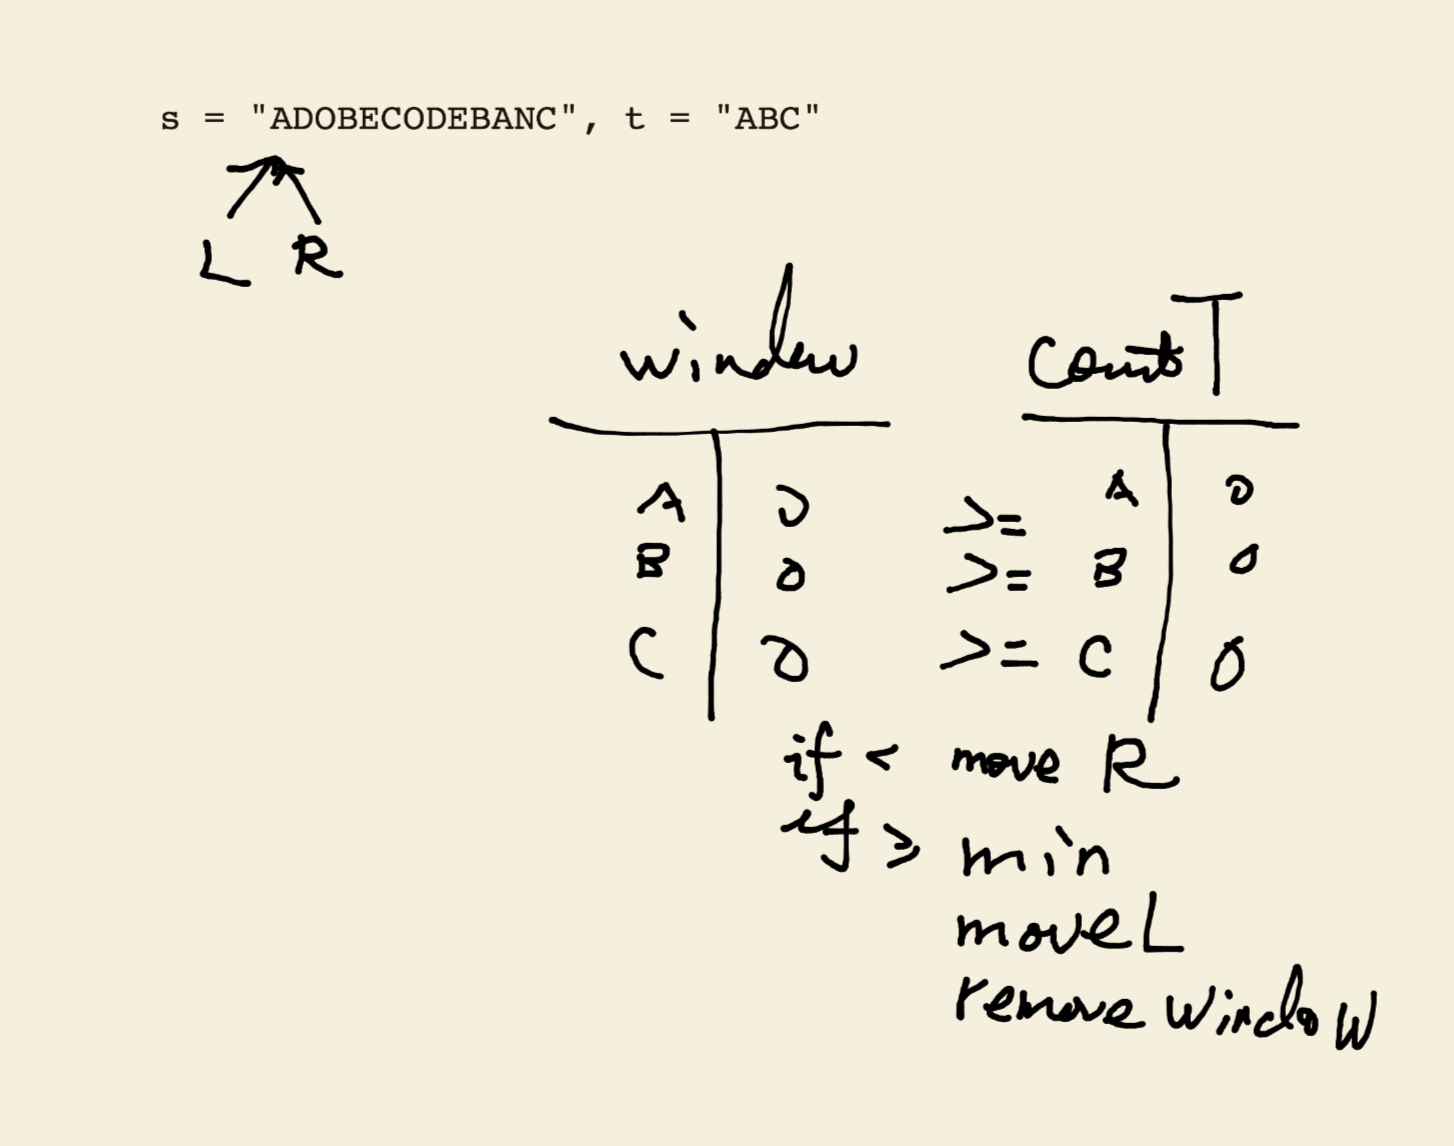

In [161]:
def minWindow(s: str, t: str) -> str:
  if len(s) < len(t):
    return ""
  if  t == "":
    return ""
  countT = {}
  for character in t:
    countT[character] = countT.get(character, 0) + 1
  left_pointer = 0
  right_pointer = 0
  window = {}
  min_len = float("inf")
  min_list = []
  prev_left = 0
  prev_right = 0
  while True:
    if window_greater_equal_countT(window, countT) is False:
      if right_pointer < len(s):
        if s[right_pointer] in countT:
          window[s[right_pointer]] = window.get(s[right_pointer], 0) + 1
        right_pointer = right_pointer + 1
    else:
      # print(window)
      min_len = min(min_len, right_pointer - left_pointer)
      min_list.append((right_pointer - left_pointer, s[left_pointer:right_pointer]))
      # print(min_list)
      if s[left_pointer] in window:
        window[s[left_pointer]] = window[s[left_pointer]] - 1
      left_pointer = left_pointer + 1
    # print(left_pointer, right_pointer)
    if prev_left == left_pointer and prev_right == right_pointer:
      break
    prev_left = left_pointer
    prev_right = right_pointer
  return min(min_list)[1] if len(min_list) > 0 else ""

def window_greater_equal_countT(window, countT):
  if len(window) != len(countT):
    return False
  for key in window:
    if window[key] < countT[key]:
      return False
  return True

In [162]:
minWindow("ADOBECODEBANC", "ABC")

'BANC'

In [163]:
minWindow("a", "a")

'a'

In [164]:
minWindow("a", "aa")

''

In [165]:
minWindow("a", "b")

''

In [166]:
minWindow("ab", "A")

''

In [167]:
minWindow("cabwefgewcwaefgcf", "cae")

'cwae'